In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
pd.set_option('max_rows',200)
pd.set_option('max_columns',200)

Populating the interactive namespace from numpy and matplotlib


In [4]:
df_labels = ['circuits','constructor_results','constructor_standings','constructors','driver_standings','drivers','drivers','lap_times','pit_stops','qualifying','races','results','seasons','status']

dfs = {}

for label in df_labels:
    dfs[label] = pd.read_csv('f1/{}.csv'.format(label))

for value in dfs.values():
    value.reset_index(drop=True,inplace=True)

result_df = dfs['results'].copy()
circuit_df = dfs['circuits'].copy()
race_df = dfs['races'].copy()
driver_df = dfs['drivers'].copy()
cons_df = dfs['constructors'].copy()
laps_df = dfs['lap_times'].copy()
pits_df = dfs['pit_stops'].copy()
status_df = dfs['status'].copy()
qual_df = dfs['qualifying'].copy()

In [26]:
dfs['results'][(dfs['results']['statusId']==3) | (dfs['results']['statusId']==4) | (dfs['results']['statusId']==130)].merge(dfs['status'])

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status
0,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4,Collision
1,14,18,14,9,9,8,\N,R,14,0.0,25,\N,\N,21,11,1:29.502,213.300,4,Collision
2,17,18,17,9,10,14,\N,R,17,0.0,0,\N,\N,\N,\N,\N,\N,4,Collision
3,18,18,18,11,16,12,\N,R,18,0.0,0,\N,\N,\N,\N,\N,\N,4,Collision
4,19,18,19,8,19,21,\N,R,19,0.0,0,\N,\N,\N,\N,\N,\N,4,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,24122,1005,825,210,20,12,\N,R,20,0.0,8,\N,\N,6,20,1:39.908,209.244,130,Collision damage
1836,24137,1006,844,15,16,9,\N,R,15,0.0,31,\N,\N,12,16,1:40.522,197.437,130,Collision damage
1837,24139,1006,154,210,8,8,\N,R,17,0.0,2,\N,\N,12,18,1:41.982,194.610,130,Collision damage
1838,24241,1011,832,1,55,7,\N,R,19,0.0,53,\N,\N,42,10,1:35.586,203.829,130,Collision damage


In [35]:
pd.set_option('display.max_rows',140)

result_df[result_df['raceId']==10]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
7733,7734,10,1,1,1,4,1,1,1,10.0,70,1:38:23.876,5903876,16,4,1:22.479,191.219,1
7734,7735,10,8,6,4,7,2,2,2,8.0,70,+11.529,5915405,70,2,1:22.434,191.323,1
7735,7736,10,17,9,14,3,3,3,3,6.0,70,+16.886,5920762,65,1,1:21.931,192.498,1
7736,7737,10,3,3,16,5,4,4,4,5.0,70,+26.967,5930843,65,3,1:22.468,191.245,1
7737,7738,10,5,1,2,6,5,5,5,4.0,70,+34.392,5938268,63,8,1:22.958,190.115,1
7738,7739,10,10,7,10,13,6,6,6,3.0,70,+35.237,5939113,63,5,1:22.506,191.157,1
7739,7740,10,18,23,22,8,7,7,7,2.0,70,+55.088,5958964,57,6,1:22.706,190.694,1
7740,7741,10,15,7,9,11,8,8,8,1.0,70,+1:08.172,5972048,65,13,1:23.261,189.423,1
7741,7742,10,6,3,17,9,9,9,9,0.0,70,+1:08.774,5972650,55,11,1:23.180,189.608,1
7742,7743,10,22,23,23,12,10,10,10,0.0,70,+1:09.256,5973132,55,9,1:23.024,189.964,1


In [38]:
cons_df['nationality'].nunique()

24

In [36]:
circuit_df

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.968000,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.738000,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.510600,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.261110,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.405000,\N,http://en.wikipedia.org/wiki/Istanbul_Park
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.420560,\N,http://en.wikipedia.org/wiki/Circuit_de_Monaco
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.50000,-73.522800,\N,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...
7,8,magny_cours,Circuit de Nevers Magny-Cours,Magny Cours,France,46.86420,3.163610,\N,http://en.wikipedia.org/wiki/Circuit_de_Nevers...
8,9,silverstone,Silverstone Circuit,Silverstone,UK,52.07860,-1.016940,\N,http://en.wikipedia.org/wiki/Silverstone_Circuit
9,10,hockenheimring,Hockenheimring,Hockenheim,Germany,49.32780,8.565830,\N,http://en.wikipedia.org/wiki/Hockenheimring


In [54]:
qual_df['duration_ms'] = qual_df.q1.apply(lambda x: (float(x.split(':')[0])*60 + float(x.split(':')[1]))*1000 if x != '\\N' else x)

AttributeError: 'float' object has no attribute 'split'

In [245]:
def time_to_ms(time):
    time = time.split(':')
    ms = float(time[0])*60 + float(time[1])
    return ms*1000
qual_df = qual_df.dropna()

In [246]:
qual_df = qual_df[(qual_df.q1!='\\N') & (qual_df.q2!='\\N') & (qual_df.q3!='\\N')]
qual_df['duration_q1_ms'] = qual_df.q1.apply(time_to_ms)

qual_df['duration_q2_ms'] = qual_df.q2.apply(time_to_ms)

qual_df['duration_q3_ms'] = qual_df.q3.apply(time_to_ms)
qual_df

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,duration_q1_ms,duration_q2_ms,duration_q3_ms
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714,86572.0,85187.0,86714.0
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869,86103.0,85315.0,86869.0
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079,85664.0,85452.0,87079.0
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178,85994.0,85691.0,87178.0
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236,85960.0,85518.0,87236.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8339,8363,1030,848,9,23,6,1:36.102,1:36.718,1:35.682,96102.0,96718.0,95682.0
8340,8364,1030,846,1,4,7,1:37.545,1:36.764,1:36.436,97545.0,96764.0,96436.0
8341,8365,1030,817,4,3,8,1:37.106,1:36.785,1:36.456,97106.0,96785.0,96456.0
8342,8366,1030,832,1,55,9,1:37.358,1:36.308,1:36.459,97358.0,96308.0,96459.0


In [247]:
df = result_df.merge(cons_df, on = 'constructorId')

In [248]:
df['cons_nat'] = df['nationality']

In [249]:
df = df.drop(columns=['number','grid','position','positionText','positionOrder','points','fastestLap','rank','fastestLapTime','fastestLapSpeed'])

In [250]:
df = df.drop(columns=['laps','time','milliseconds','constructorRef','name','nationality','url'])

In [251]:
df = df.merge(race_df,on = 'raceId')

In [252]:
df = df.drop(columns=['raceId','constructorId','year','round','name','date','time','url'])

In [253]:
df = df.merge(circuit_df,on='circuitId')

In [254]:
#df['circ_country'] = df['country']

In [255]:
df = df.drop(columns=['driverId','resultId','circuitId','circuitRef','name','location','country','alt','url'])

In [256]:
df['finished'] = df.statusId.apply(lambda x : 0 if x!=1 else 1)

In [257]:
df = df.drop(columns=['statusId','cons_nat'])

In [258]:
#df = pd.get_dummies(df,columns=['cons_nat'])

In [259]:
df['finished']

0        1
1        1
2        1
3        0
4        1
        ..
24615    0
24616    0
24617    0
24618    0
24619    0
Name: finished, Length: 24620, dtype: int64

In [260]:
df.corr()

,lat,lng,finished
lat,1.000000,-0.182762,-0.021996
lng,-0.182762,1.000000,0.102799
finished,-0.021996,0.102799,1.000000


In [261]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['finished'])
Y = df['finished']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=42,
)

In [262]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 3)
dt = clf.fit(X=X_train, y=y_train)
print('Score : ',clf.score(X=X_test, y=y_test)) 
clf.predict(X_test)

Score :  0.7487137828323855


array([0, 0, 0, ..., 0, 0, 0])

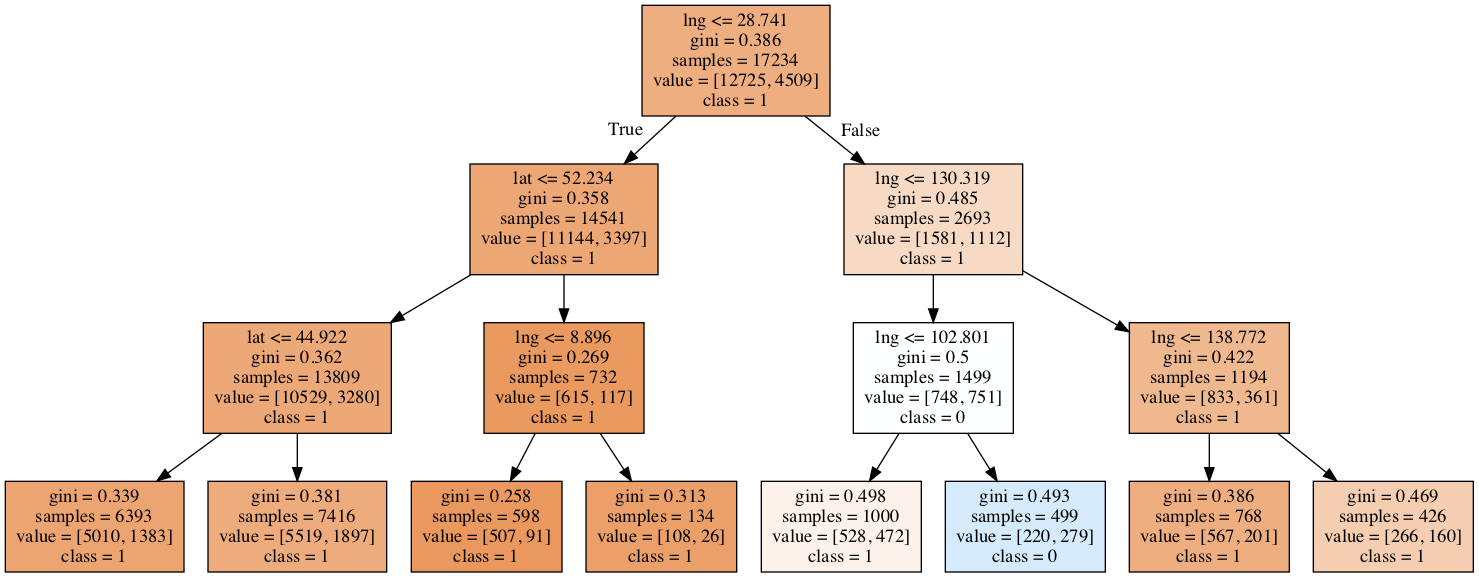

In [263]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [368]:
race_df.isnull().sum()

raceId       0
year         0
round        0
circuitId    0
name         0
date         0
time         0
url          0
dtype: int64

In [367]:
result_df.isnull().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [366]:
driver_df.isnull().sum()

driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            1
dtype: int64

In [369]:
driver_df.shape

(847, 9)

# VIZZZZZ

In [ ]:
for year in years:
    

In [10]:
N_races = race_df[race_df.circuitId==20]['raceId']

In [35]:
circuit_race = result_df.merge(race_df,on='raceId').merge(circuit_df,on='circuitId')
circuit_race = circuit_race[['statusId','circuitRef']]
circuit_race['collision'] = circuit_race.statusId.apply(lambda x: 1 if x in [3,4,130] else 0)
circuit_crashes = circuit_race.groupby('circuitRef').collision.sum()
circuit_crashes.sort_values(ascending=False).nlargest(50)

circuitRef
monaco            191
spa               100
monza              93
villeneuve         87
nurburgring        85
interlagos         79
silverstone        76
indianapolis       69
albert_park        61
hockenheimring     59
osterreichring     57
zandvoort          52
suzuka             48
catalunya          46
hungaroring        45
long_beach         41
galvez             39
zolder             39
kyalami            36
adelaide           31
marina_bay         29
detroit            28
imola              28
brands_hatch       27
watkins_glen       27
jacarepagua        22
estoril            20
mosport            19
magny_cours        18
shanghai           17
rodriguez          16
jarama             16
sepang             15
yeongam            14
ricard             14
fuji               12
yas_marina         11
sochi              11
dijon              11
americas           10
jerez              10
montjuic           10
bahrain             9
BAK                 9
anderstorp          8

In [45]:
circuit_df.iloc[3,2]

'Circuit de Barcelona-Catalunya'

In [31]:
status_df

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
5,6,Gearbox
6,7,Transmission
7,8,Clutch
8,9,Hydraulics
9,10,Electrical


In [355]:
result_df1 = result_df[result_df.positionOrder==1]
result_df1

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
22,23,19,8,6,1,2,1,1,1,10.0,56,1:31:18.555,5478555,37,2,1:35.405,209.158,1
44,45,20,13,6,2,2,1,1,1,10.0,57,1:31:06.970,5466970,38,3,1:33.600,208.153,1
66,67,21,8,6,1,1,1,1,1,10.0,66,1:38:19.051,5899051,46,1,1:21.670,205.191,1
88,89,22,13,6,2,1,1,1,1,10.0,58,1:26:49.451,5209451,16,3,1:26.666,221.734,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24520,24526,1026,822,131,77,3,1,1,1,25.0,52,1:21:46.755,4906755,49,4,1:31.862,227.571,1
24540,24546,1027,1,131,44,3,1,1,1,25.0,71,1:36:48.904,5808904,66,4,1:19.461,194.993,1
24560,24566,1028,822,131,77,1,1,1,1,25.0,56,1:33:55.653,5635653,37,2,1:36.957,204.696,1
24580,24586,1029,830,9,33,1,1,1,1,25.0,71,1:33:14.678,5594678,61,2,1:10.862,218.909,1


In [356]:
df = result_df1.merge(driver_df,on='driverId').merge(race_df,on='raceId')[['nationality','year','positionOrder','forename','surname']]

In [357]:
df = df.sort_values('year').reset_index(drop=True)

In [358]:
df['name'] = df.apply(lambda x: x['forename']+' '+x['surname'],axis=1)

In [359]:
df = df.drop(columns=['forename','surname'])

In [360]:
df

,nationality,year,positionOrder,name
0,American,1950,1,Johnnie Parsons
1,Argentine,1950,1,Juan Fangio
2,Argentine,1950,1,Juan Fangio
3,Argentine,1950,1,Juan Fangio
4,Italian,1950,1,Nino Farina
...,...,...,...,...
1016,British,2019,1,Lewis Hamilton
1017,German,2019,1,Sebastian Vettel
1018,Monegasque,2019,1,Charles Leclerc
1019,British,2019,1,Lewis Hamilton


In [361]:
df.name.unique()

for year in years:
    for name in df.name.unique():
        if name not in df[df.year==int(year)]['name']:
            df = df.append({'nationality':df[df['name']==name]['nationality'].iloc[0],'year':year,'positionOrder':0,'name':name},ignore_index=True)



In [362]:
df[df.year==2018]

,nationality,year,positionOrder,name
979,German,2018,1,Sebastian Vettel
980,German,2018,1,Sebastian Vettel
981,German,2018,1,Sebastian Vettel
982,Finnish,2018,1,Kimi Räikkönen
983,British,2018,1,Lewis Hamilton
984,Australian,2018,1,Daniel Ricciardo
985,German,2018,1,Sebastian Vettel
986,British,2018,1,Lewis Hamilton
987,Australian,2018,1,Daniel Ricciardo
988,British,2018,1,Lewis Hamilton


In [352]:
for year in years:
    print(df[df.year==int(year)].name.unique())

['Johnnie Parsons' 'Juan Fangio' 'Nino Farina']
['Juan Fangio' 'Alberto Ascari' 'Luigi Fagioli' 'Nino Farina'
 'Lee Wallard' 'José Froilán González']
['Piero Taruffi' 'Alberto Ascari' 'Troy Ruttman']
['Juan Fangio' 'Mike Hawthorn' 'Bill Vukovich' 'Alberto Ascari'
 'Nino Farina']
['Juan Fangio' 'Bill Vukovich' 'Mike Hawthorn' 'José Froilán González']
['Maurice Trintignant' 'Juan Fangio' 'Stirling Moss' 'Bob Sweikert']
['Juan Fangio' 'Stirling Moss' 'Luigi Musso' 'Pat Flaherty'
 'Peter Collins']
['Stirling Moss' 'Juan Fangio' 'Sam Hanks' 'Tony Brooks']
['Mike Hawthorn' 'Peter Collins' 'Stirling Moss' 'Tony Brooks'
 'Maurice Trintignant' 'Jimmy Bryan']
['Stirling Moss' 'Jack Brabham' 'Bruce McLaren' 'Tony Brooks' 'Jo Bonnier'
 'Rodger Ward']
['Phil Hill' 'Stirling Moss' 'Jack Brabham' 'Bruce McLaren' 'Jim Rathmann']
['Innes Ireland' 'Giancarlo Baghetti' 'Wolfgang von Trips' 'Stirling Moss'
 'Phil Hill']
['Jim Clark' 'Bruce McLaren' 'Graham Hill' 'Dan Gurney']
['Jim Clark' 'John Surtees' '

In [337]:
years = list(df.year.unique())

for i,year in enumerate(years):
    years[i] = str(year)

nationalities = list(df.groupby('nationality').count().positionOrder.nlargest(10).index.values)

nationalities

['British',
 'German',
 'Brazilian',
 'French',
 'Finnish',
 'Italian',
 'Australian',
 'Austrian',
 'Argentine',
 'American']

In [320]:
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

In [ ]:
fig_dict["layout"]["xaxis"] = {"range": [30, 85], "title": "Life Expectancy"}
fig_dict["layout"]["yaxis"] = {"title": "GDP per Capita", "type": "log"}
fig_dict["layout"]["hovermode"] = "closest"

# XGBoost

In [52]:
df = result_df.merge(cons_df, on = 'constructorId')

df = df.drop(columns=['number','grid','position','positionText','positionOrder','points','fastestLap','rank','fastestLapTime','fastestLapSpeed'])

df = df.drop(columns=['laps','time','milliseconds','constructorRef','name','nationality','url'])

df = df.merge(race_df,on = 'raceId')

df = df.drop(columns=['raceId','constructorId','year','round','name','date','time','url'])

df = df.merge(circuit_df,on='circuitId')

df = df.drop(columns=['driverId','resultId','circuitId','circuitRef','name','location','country','alt','url'])

df['finished'] = df.statusId.apply(lambda x : 0 if x!=1 else 1)



df = df.drop(columns=['statusId'])


df['finished']


0        1
1        1
2        1
3        0
4        1
        ..
24615    0
24616    0
24617    0
24618    0
24619    0
Name: finished, Length: 24620, dtype: int64

In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

X, y = data.iloc[:,:-1],data.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

